In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'sample_submission.csv', 'test.csv']


Let's import the dataset train.csv that is located in "../input/" into our pandas [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)

In [2]:
train = pd.read_csv('../input/train.csv')

The first thing we do after importing our dataset into our DataFrame is to perform some Exploratory Data Analysis [EDA](https://www.datacamp.com/community/tutorials/kaggle-machine-learning-eda) . We will see in the next sessions how to perform EDA in depth but for now we will explore the following:
* Number of traininig examples, the number of columns(features)
* Correletaion between features in the dataset
* Number of NaNs in the dataset
* Number of outliers in the dataset

#### Number of traininig examples, the number of columns(features)
Let's start by exploring the number of training examples and features in the dataset. The number of traininig examples is simply the number of rows in the DataFrame and the number of features is the number of columns. We will use DataFrame.shape which returns a tuple (n_rows, n_cols) as follows:

In [3]:
print(train.shape)
print("Number of features in the dataset = %i" % train.shape[0])
print("Number of features in the daataset = %i" % train.shape[1])

(15120, 56)
Number of features in the dataset = 15120
Number of features in the daataset = 56


Now it is the time to have a look on the first rows of the dataset using DataFrame.head(n_rows), where the default number of rows to be displayed is 5 if the n_rows parameter is not specified.

In [4]:
train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [5]:
train.head(7)

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
5,6,2579,132,6,300,-15,67,230,237,140,6031,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2
6,7,2606,45,7,270,5,633,222,225,138,6256,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


### Correletaion between features in the dataset 
To find the correlation between features in the dataset we will use DataFrame.corr(). the corr() function will provide us with the correlation betwwen every two features in the dataset. The correlation between any feature and itself is simply equals to 1 so the principal diagonal of this square matrix will be equal to 1.

In [6]:
train.corr()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Id,1.000000,0.185496,0.017702,-0.020168,0.099637,0.055348,-0.033028,0.000786,0.073123,0.042524,-0.068739,-0.339861,0.158484,0.384219,-0.158451,-0.058451,0.045545,-0.045757,0.118214,-0.041713,-0.046017,NaN,-0.013159,-0.014219,0.032292,0.063372,-0.129930,0.015145,-0.016034,NaN,-0.003794,-0.002940,-0.070252,-0.029707,-0.069537,0.014734,0.035739,-0.017422,0.034019,0.005675,0.031176,0.024141,-0.005104,-0.231780,-0.157515,0.025826,0.068048,0.066887,0.022520,0.057480,0.009110,0.016040,0.086932,0.083376,0.122475,0.108363
Elevation,0.185496,1.000000,-0.011096,-0.312640,0.412712,0.122092,0.578659,0.097900,0.215782,0.089518,0.443563,0.330417,0.261729,0.354025,-0.783651,-0.218818,-0.147947,-0.307523,-0.125342,-0.141478,-0.187354,NaN,0.002934,-0.010571,-0.357816,-0.037906,0.017432,0.039304,-0.140619,NaN,-0.066252,-0.200663,-0.035173,0.029808,0.008548,0.032509,0.146236,0.159872,0.097647,0.010586,0.020669,0.040019,-0.001077,0.165304,0.048204,0.093191,0.172349,0.123821,0.021876,0.120157,0.040571,0.073825,0.323440,0.296405,0.306755,0.016090
Aspect,0.017702,-0.011096,1.000000,0.028148,0.040732,0.056412,0.066184,-0.593997,0.324912,0.635022,-0.052169,-0.131262,0.028238,0.032578,0.075228,-0.024538,-0.020970,-0.069120,0.018019,0.000343,-0.006066,NaN,0.001723,-0.019391,0.111959,-0.034549,-0.044142,0.024312,0.001181,NaN,0.027121,0.029870,-0.042140,0.007570,-0.023330,0.018815,0.022301,0.041880,0.005480,-0.002340,-0.009775,0.018986,0.026330,-0.063428,-0.086897,0.008160,0.003700,0.018719,0.012927,-0.004235,0.003160,-0.046309,0.043860,-0.031342,0.007208,0.008015
Slope,-0.020168,-0.312640,0.028148,1.000000,-0.055976,0.265314,-0.277049,-0.200072,-0.612613,-0.326887,-0.239527,-0.152820,-0.065923,-0.113033,0.286985,0.099355,-0.081498,0.265541,0.087841,0.074720,-0.047868,NaN,-0.012989,-0.022220,0.255804,-0.109798,-0.115088,0.119863,-0.054085,NaN,-0.064321,-0.124375,-0.069326,-0.047742,-0.068508,-0.033935,-0.076393,-0.184528,0.017982,0.011062,-0.030700,0.012295,0.036082,-0.083108,0.118725,-0.076851,-0.147258,0.072027,-0.030590,-0.048855,-0.004570,0.003129,-0.148342,0.051900,-0.043513,0.087722
Horizontal_Distance_To_Hydrology,0.099637,0.412712,0.040732,-0.055976,1.000000,0.652142,0.203397,-0.033803,0.080047,0.080833,0.158817,-0.009402,0.087484,0.200532,-0.239303,-0.084766,0.024234,-0.089578,-0.059398,-0.025247,0.021203,NaN,0.002819,-0.005523,-0.112852,0.026150,0.034306,0.026595,-0.111878,NaN,-0.084804,-0.159717,-0.018282,-0.033946,-0.062873,-0.025207,-0.007840,-0.087963,0.046915,-0.004615,0.027879,0.064616,0.019663,0.033854,-0.032540,0.060886,0.138275,0.062121,0.072485,-0.015446,0.077251,-0.009549,0.131444,0.066284,0.242304,-0.010515
Vertical_Distance_To_Hydrology,0.055348,0.122092,0.056412,0.265314,0.652142,1.000000,0.011555,-0.095930,-0.132948,-0.035559,-0.015048,-0.117835,0.017108,0.069884,0.027321,-0.034309,0.005436,0.070414,-0.016543,0.018550,0.094701,NaN,-0.007049,-0.014610,0.018305,-0.029364,-0.033237,0.085309,-0.087445,NaN,-0.070201,-0.155574,-0.039745,-0.040898,-0.065710,-0.022197,-0.064122,-0.144317,0.017148,-0.011697,-0.016315,0.047304,0.046287,-0.056267,-0.000083,0.006247,0.020298,0.077167,0.028910,-0.021662,0.015680,-0.020717,-0.008989,0.058981,0.227110,0.075647
Horizontal_Distance_To_Roadways,-0.033028,0.578659

The correlation matrix may not be easy to be read, so we use the heatmap to find the correlation between the features using some sort of colored visualization as follows

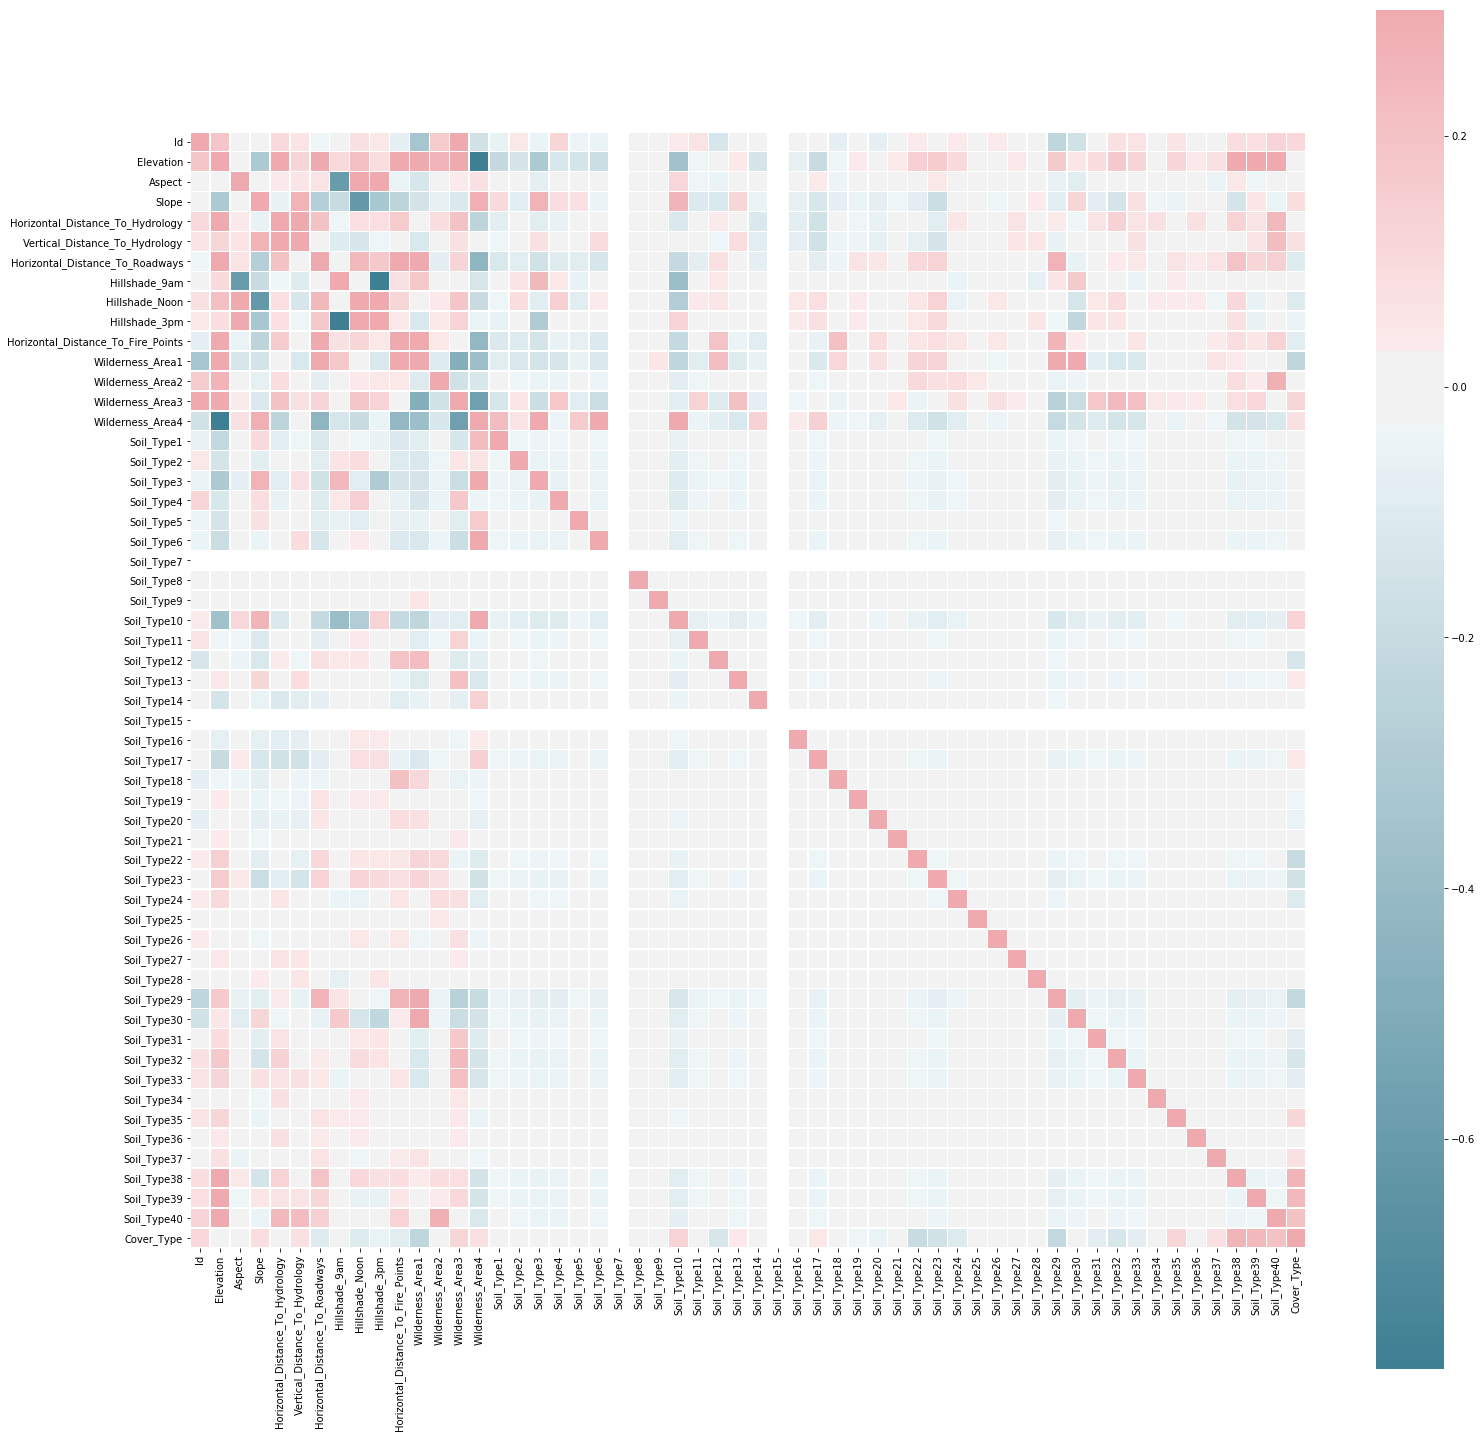

In [7]:
import seaborn as sns


import matplotlib.pyplot as plt


corr = train.corr()
f, ax = plt.subplots(figsize=(25, 25))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5)


### Number of NaNs in the dataset
To find the number of NaNs in the dataset we use the function DataFrame.isna() which provides us with true in the places where an element in the dataset is NaN or None. We then sum the matrix we have where True + True = 2 as True is treated as numerical 1. Using this way we will have the number of NaNs for each feature as follows:

In [8]:
train.isna().sum()

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


We didn't have NaNs to experiment with so let's inject some NaNs in the Elevation feature

In [9]:
train['Elevation'] = None

In [10]:
train.drop(['Aspect'],inplace = True, axis = 1)

In [11]:
train.drop(['Cover_Type'],inplace = True, axis = 1)

In [12]:
train.isna().sum()

Id                                        0
Elevation                             15120
Slope                                     0
Horizontal_Distance_To_Hydrology          0
Vertical_Distance_To_Hydrology            0
Horizontal_Distance_To_Roadways           0
Hillshade_9am                             0
Hillshade_Noon                            0
Hillshade_3pm                             0
Horizontal_Distance_To_Fire_Points        0
Wilderness_Area1                          0
Wilderness_Area2                          0
Wilderness_Area3                          0
Wilderness_Area4                          0
Soil_Type1                                0
Soil_Type2                                0
Soil_Type3                                0
Soil_Type4                                0
Soil_Type5                                0
Soil_Type6                                0
Soil_Type7                                0
Soil_Type8                                0
Soil_Type9                      

In [13]:
train.head()

,Id,Elevation,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,1,None,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,2,None,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,3,None,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,None,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,None,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


Now let's try to remove the NaN values we have

In [14]:
train.dropna(inplace = True, axis = 1)

### Number of outliers in the dataset
We will discover a way of removing the outliers based on the standard deviation of the data where statistically any point that lies away from the mean with 2.5 or 3 stds can be treated as an outlier. we will use a method called zscores from stats library. We need to remove the categorical data first before starting as we can't calculate the zcore for a binary feature

In [15]:
numerical = train.drop(["Soil_Type"+str(x) for x in range(1, 41)], axis = 1)

In [16]:
numerical = numerical.drop(["Wilderness_Area" + str(x) for x in range(1, 5)], axis = 1)

If you missed some of those steps, don't worry we will explain this in details in the next sessions insha'Allah.

In [17]:
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(numerical))

print(len(np.unique(np.where(z > 3)[0])) )

1130


(Optional) removing outliers

In [18]:
from scipy import stats
import numpy as np

t_rain = train[(z <= 3).all(axis = 1)]

print( t_rain.shape )

(13990, 53)
